<a href="https://colab.research.google.com/github/DonaFidele/Arithmetic-Formatter/blob/main/SVM_ecg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#importation des données
data=pd.read_csv('ecg.csv')
data.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1.0


In [3]:
data.shape

(4997, 141)

In [4]:
data.isnull().mean()

-0.11252183    0.0
-2.8272038     0.0
-3.7738969     0.0
-4.3497511     0.0
-4.376041      0.0
              ... 
0.22807718     0.0
0.12343082     0.0
0.92528624     0.0
0.19313742     0.0
1.0            0.0
Length: 141, dtype: float64

In [5]:
data.describe()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
count,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,...,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000,4997.000000
mean,-0.262532,-1.649593,-2.492366,-3.119508,-3.167414,-2.866184,-2.272863,-1.797750,-1.409816,-0.935898,...,0.071168,-0.062821,-0.276300,-0.507968,-0.761527,-0.835386,-0.642892,-0.487950,-0.706754,0.583950
std,1.152563,1.445591,1.386477,1.302936,1.104513,0.906362,0.731666,0.622856,0.636923,0.657822,...,1.404529,1.646210,1.894644,2.059515,2.086289,2.056447,1.859564,1.831162,1.414498,0.492951
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004439,-2.701395,-3.667851,-4.227203,-4.007389,-3.480760,-2.779853,-2.165844,-1.773994,-1.362007,...,-1.088029,-1.588688,-2.147271,-2.731039,-3.031581,-2.868739,-2.155084,-1.658548,-1.596867,0.000000
50%,-0.297583,-1.661891,-2.585872,-3.388020,-3.468898,-2.946908,-2.285430,-1.750063,-1.422461,-0.910449,...,0.658234,0.717676,0.604723,0.333481,-0.030771,-0.202761,-0.194480,-0.160768,-0.568775,1.000000
75%,0.500057,-0.677702,-1.514058,-2.235425,-2.531019,-2.398789,-1.823473,-1.483699,-1.063533,-0.476386,...,1.169415,1.238671,1.264441,1.234413,1.034046,0.945220,0.951666,1.002628,0.271822,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


In [6]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4992    False
4993    False
4994    False
4995    False
4996    False
Length: 4997, dtype: bool

In [7]:
#division du jeu de données en jeu d'entrainement et de test
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3)

In [8]:
# centrons et réduisons les données
from sklearn import preprocessing
scale=preprocessing.StandardScaler()
scale.fit_transform(Xtrain,Xtest)

array([[-1.54370475, -1.35666326, -1.01063987, ...,  0.33454639,
        -0.28469631, -1.27862778],
       [ 0.98208149,  1.22025169,  1.09123351, ..., -1.01699602,
        -0.5591672 ,  0.24578008],
       [-0.45196869, -0.0526829 ,  0.12422541, ..., -0.04505464,
        -0.13966849, -0.77914358],
       ...,
       [-0.13044037, -0.44907994, -0.84968622, ...,  0.25125571,
         0.51356343,  0.27211278],
       [ 0.88507272,  0.51728725,  0.15880688, ..., -0.1386001 ,
         0.16960077,  0.31113035],
       [-0.83326777, -0.15842676,  0.50364053, ...,  0.00847948,
        -0.10033588,  0.74833589]])

In [9]:
#construction du modèle
from sklearn import svm
classifier = svm.SVC(kernel='rbf' ,gamma=50)

#entrainement du modèle
classifier.fit(Xtrain,ytrain)

SVC(gamma=50)

In [10]:
#faisons à présent les prédictions
y_pred=classifier.predict(Xtest)
y_pred

array([1., 1., 1., ..., 1., 1., 1.])

In [14]:
#petite comparaison avec les étiquettes réelles
ytest.iloc[0:4]

#matrice de confusion
from sklearn import metrics
metrics.confusion_matrix(ytest,y_pred)

array([[  0, 636],
       [  0, 864]])

Le modèle prédity qu'aucun patients n'est sain et que 643 comportent une anomalie à tord.
Il prédit également 857 comportant une anomalie et aucun sain à tord.


In [15]:
#traçons la courbe ROC  et observons la
fpr,tpr,thr=metrics.roc_curve(ytest,y_pred)

#calcule de l'aire sous la courbe ROC
auc=metrics.auc(fpr,tpr)

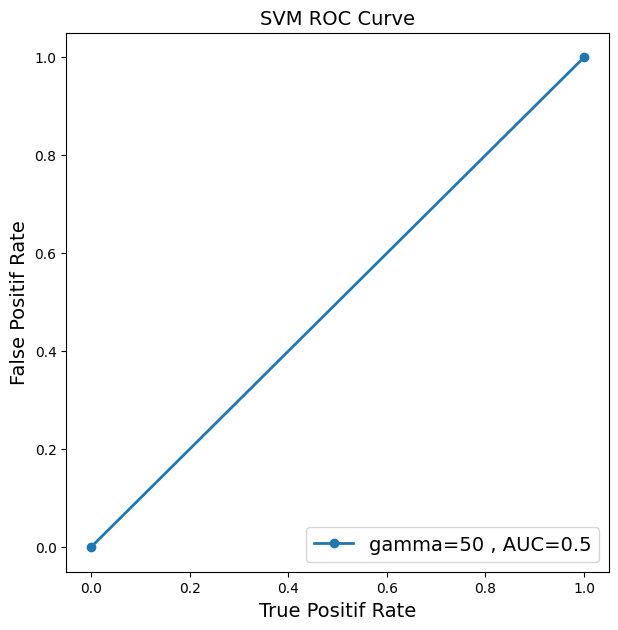

In [17]:
#création d'une figure 
fig=plt.figure(figsize=(7,7))

#traçons la courbe des trues positifs rate en fonction des falses positifs rate
plt.plot(fpr,tpr, 'o-' ,lw=2 , label=f'gamma=50 , AUC={auc}')
plt.legend(loc='lower right' ,fontsize=14)

#titres
plt.xlabel('True Positif Rate',fontsize=14)
plt.ylabel('False Positif Rate',fontsize=14)
plt.title('SVM ROC Curve' , fontsize=14)

plt.show()

L'auc est égale à 0.5 donc le modèle est incapable de discriminé les classes positives des classes négatives.

# Optimisation des performances du modèle

Choisissons des valeurs optimales pour le modele à l'aide d'une validation croisée sur le jeu d'entrainement

In [18]:
from sklearn.model_selection import GridSearchCV

#choisissons 6 valeurs pour C entre le 10^-2 et 10^3
C_range=np.logspace(-2,3,6)

#4 pour gamma entre 10^-2 et 10
gamma_range=np.logspace(-2,1,4)

#critere de selection du meilleur  modele 
score='roc_auc'

# grille de hyperparamètres à tester et leurs valeurs possibles
param_grid={'C':C_range,'gamma':gamma_range}

# initialiser une recherche sur grille pour trouver les meilleurs hyperparamètres
grid=GridSearchCV(svm.SVC(kernel='rbf') ,param_grid, cv=5, scoring=score)

# faire tourner la recherche sur grille
grid.fit(Xtrain,ytrain)

#les parametres optimaux
grid.best_params_,grid.best_score_

({'C': 1.0, 'gamma': 0.1}, 0.9984091859546679)

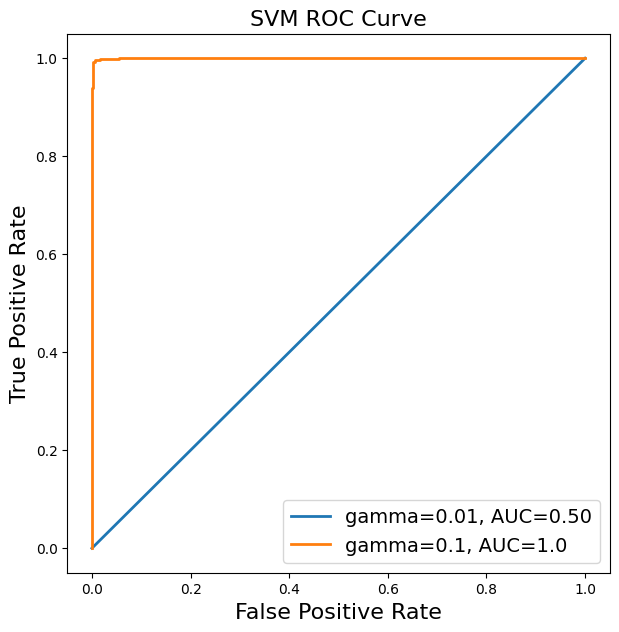

In [22]:
# prédire sur le jeu de test avec le modèle optimisé
y_pred_cv=grid.decision_function(Xtest)

#construire la courbe ROC du modèle optimisé
fpr_cv, tpr_cv, thr_cv = metrics.roc_curve(ytest, y_pred_cv)

# calculer l'aire sous la courbe ROC du modèle optimisé
auc_cv = metrics.auc(fpr_cv, tpr_cv)


# créer une figure
fig = plt.figure(figsize=(7, 7))

# afficher la courbe ROC précédente
plt.plot(fpr, tpr, '-', lw=2, label='gamma=0.01, AUC=%.2f' % auc)

# afficher la courbe ROC du modèle optimisé
plt.plot(fpr_cv, tpr_cv, '-', lw=2, label=f"gamma={grid.best_params_['gamma']}, AUC={auc_cv.round()}")
         

# donner un titre aux axes et au graphique
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('SVM ROC Curve', fontsize=16)

# afficher la légende
plt.legend(loc="lower right", fontsize=14)

# afficher l'image
plt.show()

On remarque que auc est égale à 1.Ce qui veut dire que notre modèle discrimine parfaitement les classes positives des classes négatives.

Calaculons la matrice de Gram obtenue sur notre jeu d'entrainement quand gamma = 0,1

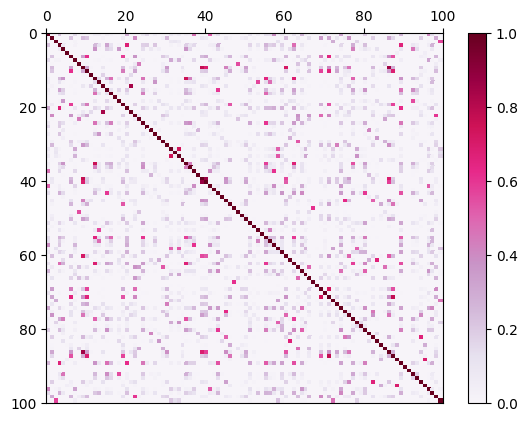

In [24]:
import matplotlib

kmatrix = metrics.pairwise.rbf_kernel(Xtrain, gamma=0.1)

kmatrix100 = kmatrix[:100, :100]

# dessiner la matrice
plt.pcolor(kmatrix100, cmap=matplotlib.cm.PuRd) 

# rajouter la légende
plt.colorbar()

# retourner l'axe des ordonnées
plt.gca().invert_yaxis()
plt.gca().xaxis.tick_top()

# afficher l'image
plt.show()